## NamastePymc3 examples

All this code leans hevily on Dan Foreman-Mackey's exoplanet project (http://github.com/dfm/exoplanet), specifically the K2-3 example.

In [3]:
# Importing the important things:

import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import pymc3 as pm
import corner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import NamastePymc3 as namaste

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


# TESS example: TIC 128703021

Running on a TESS example, TIC128703021 (this will download the lightcurve).

The inputs here are:
* list of: initial depths (600ppm)
* list of: initial t0s (1601.85)
* stellar dictionary with stellar radius, density, Teff and logg (from spctra/Gaia DR2 in this case)
* We specify the mission
* We LoadFromFile (works if there is already a pickled Pymc3 output present - if not, run from scratch)

Initialising transit model
Teff: [6216  100  100]
[0.33832475 0.2164776 ] [0.05 0.05]
Rs __str__ = [1.54]
RpRs __str__ = [0.0244949]
u_star __str__ = [0.5 0.5]
r_pl __str__ = [0.03772214]
[22.04649063] t0 [1599.95737721 1599.95876614 1599.96432184 1599.96571077 1599.96987754
 1599.97126647 1599.97265539 1599.97404432 1599.97543324 1599.97960002] 0.0013888966809645353
Model loaded
/Users/hosborn/Postdoc/NamastePymc3
(3, 13849, 1)
(13849, 1)
varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star']


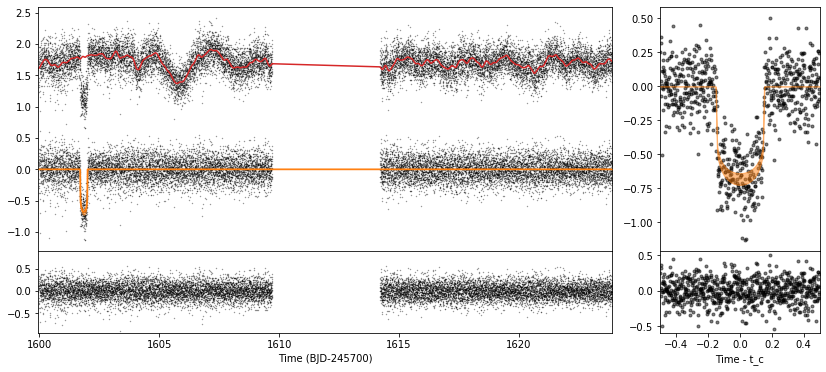

<Figure size 432x288 with 0 Axes>

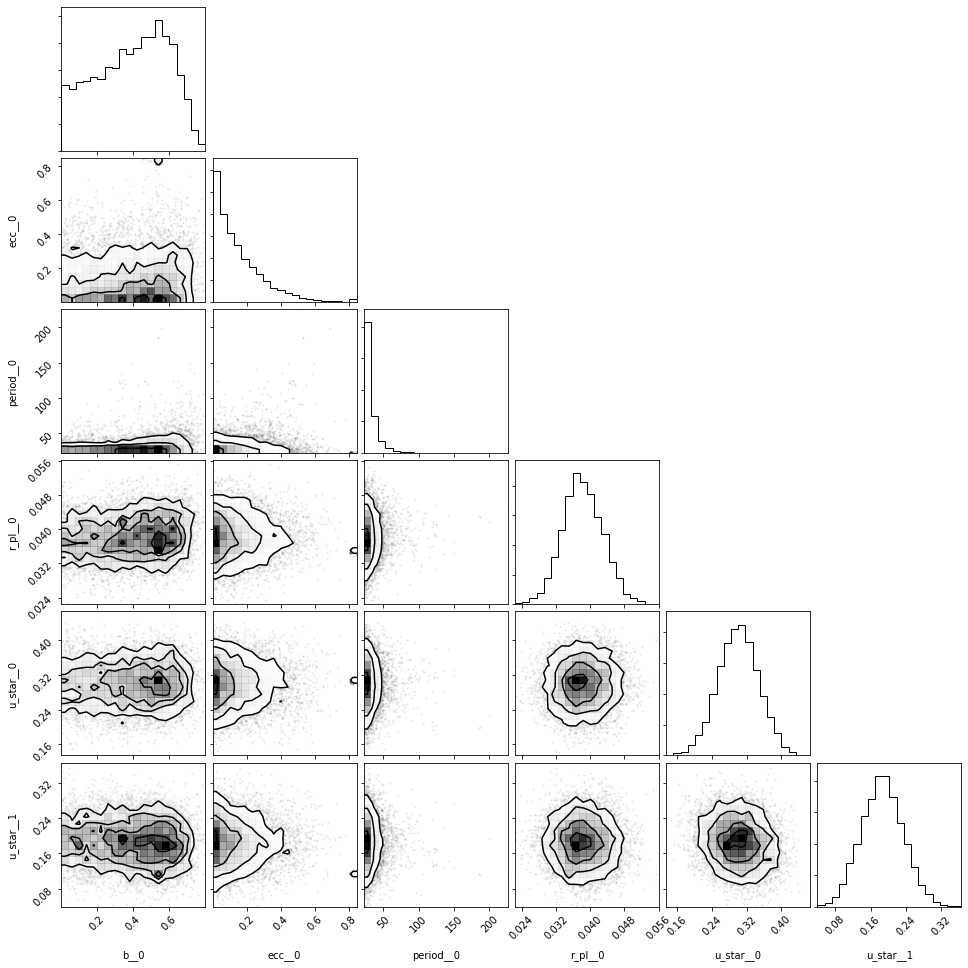

In [22]:
mod,trace,lc=namaste.Run(128703021, [600e-6], [1601.85],
                        stellardict={'Rs':1.54,'Rs_err':0.18,
                                     'rho_s':0.34872195*1.408,'rho_s_err':(0.08052529*1.408, 0.11735043*1.408),
                                     'Teff':6216,'Teff_err':100,
                                     'logg':4.16,'logg_err':0.12},
                        mission='TESS',LoadFromFile=True)

# K2 example: EPIC 248847494

As above. With added keywords:
* `initdur` is a list of initial durations. This is needed here as the inital fits are poor due to the extreme long duration of this object.
* `cutDistance` - how far from the transit to cut the lightcurve (in order to speed up processing)
* `overwrite` - overwrites files
* `doplots` - Whether to output & save plots of transit and corner

K2 campaigns to search: 14
<class 'astropy.io.fits.hdu.hdulist.HDUList'> opening  https://archive.stsci.edu/hlsps/everest/v2/c14/248800000/47494/hlsp_everest_k2_llc_248847494-c14_kepler_v2.0_lc.fits True [(145045., 181515.596964  , 181433.00405312, 12.48065163, 524288, 3072.72831697, 181595.19825035, 1.,  2.08815894, 1.06189705, -3.85695881, -5.62092419,  2.26823228)
 (145046., 181479.56331565, 181415.50646782, 12.47662382,      0, 3072.74874933, 181560.20064421, 1.,  2.06002603, 1.03774348, -3.84177164, -5.57455993,  2.26357209)
 (145047., 181475.45334854, 181437.53977966, 12.47655879,      0, 3072.76918168, 181557.12263849, 1.,  2.03200393, 1.01374376, -3.82662341, -5.52838199,  2.25891594)
 ...
 (148943., 181705.14397278, 181449.56228256, 12.78263635,      0, 3152.37160894, 181150.62646721, 1., -1.65019809, 1.34649801,  1.72583957,  3.3066403 , -0.50701086)
 (148944., 181706.17168227, 181394.67279243, 12.78368103,      0, 3152.39204067, 181151.68722028, 1., -1.6497908 , 1.36781656, 

Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]
INFO:pymc3:NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]
Sampling 4 chains: 100%|██████████| 8000/8000 [08:20<00:00, 15.99draws/s]
There were 208 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 208 divergences after tuning. Increase `target_accept` or reparameterize.
There were 181 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 181 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9636149176076804, but should be close to 0.9. Try to increase the number of tuning steps.
There were 198 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 198 divergences af

(3, 429, 1)
(429, 1)
2.017499715924548 1.9009926552983498 0.9422517585967505
varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star', 'vrel']


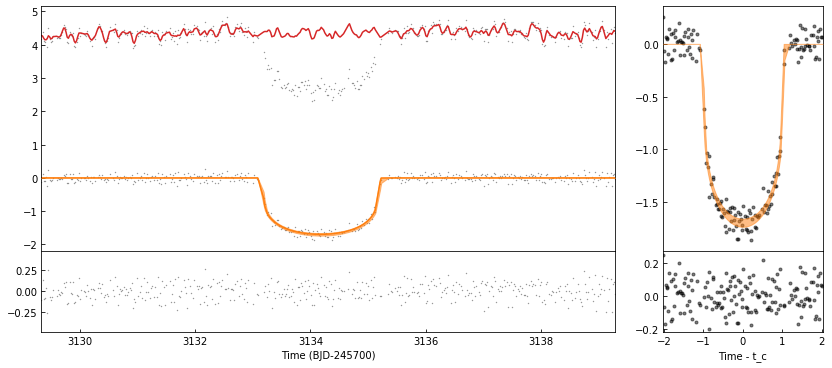

<Figure size 432x288 with 0 Axes>

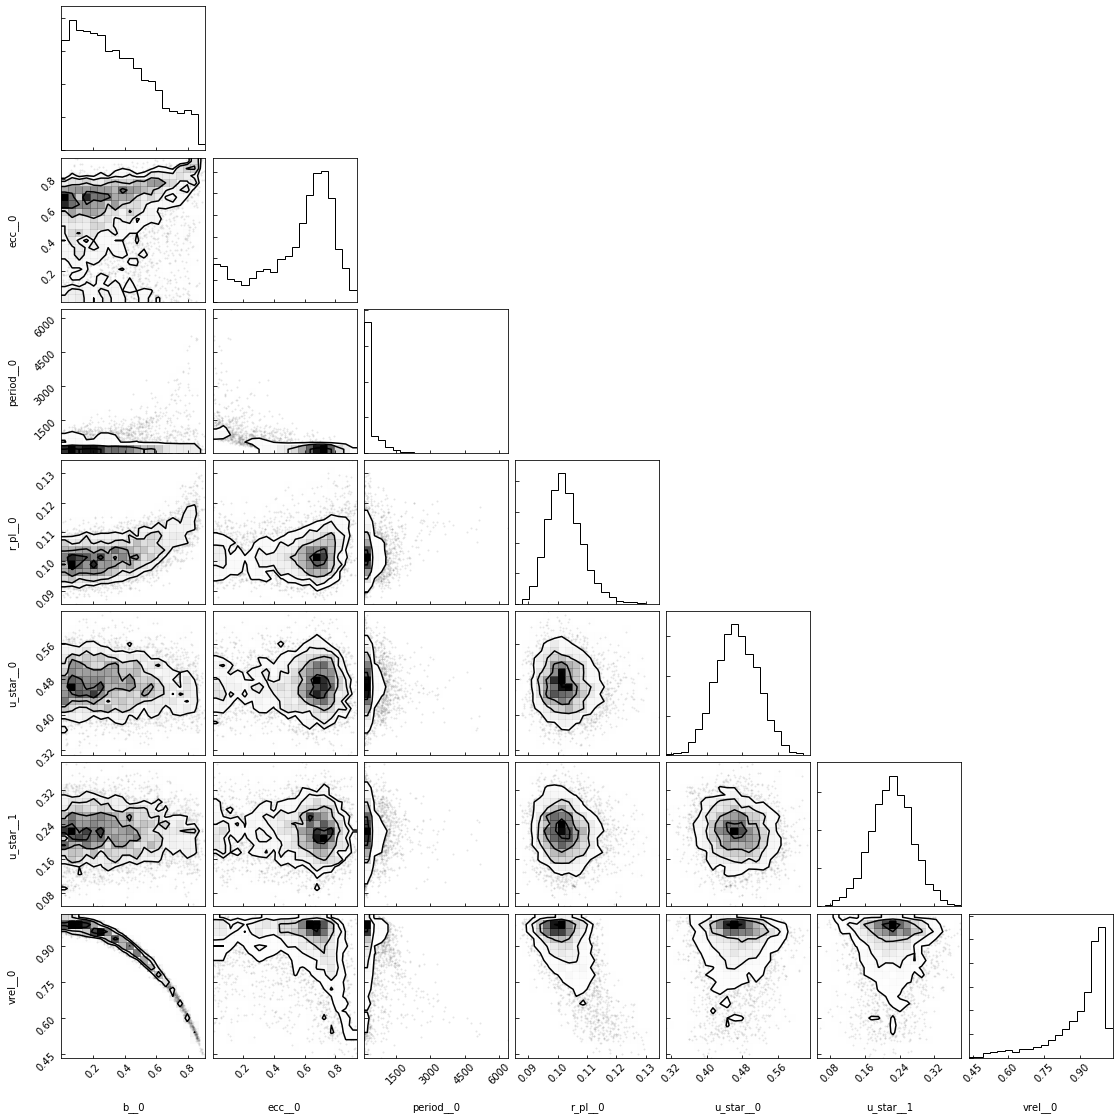

In [80]:
mod,trace,lc=namaste.Run(248847494, [1.5e-3], [3134.3],
                        stellardict={'Rs':2.70,'Rs_err':0.12,
                                     'rho_s': 0.064,'rho_s_err':0.007,
                                     'Teff':4898,'Teff_err':68,
                                     'logg':3.52,'logg_err':0.1},doplots=True,
                        mission='K2',cutDistance=5.0,overwrite=True,initdur=[2.1])

#### We can plot specific corner plots too with `PlotCorner`

varnames =  ['b', 'ecc', 'omega', 'logp', 'r_pl', 'u_star', 'vrel']


<Figure size 432x288 with 0 Axes>

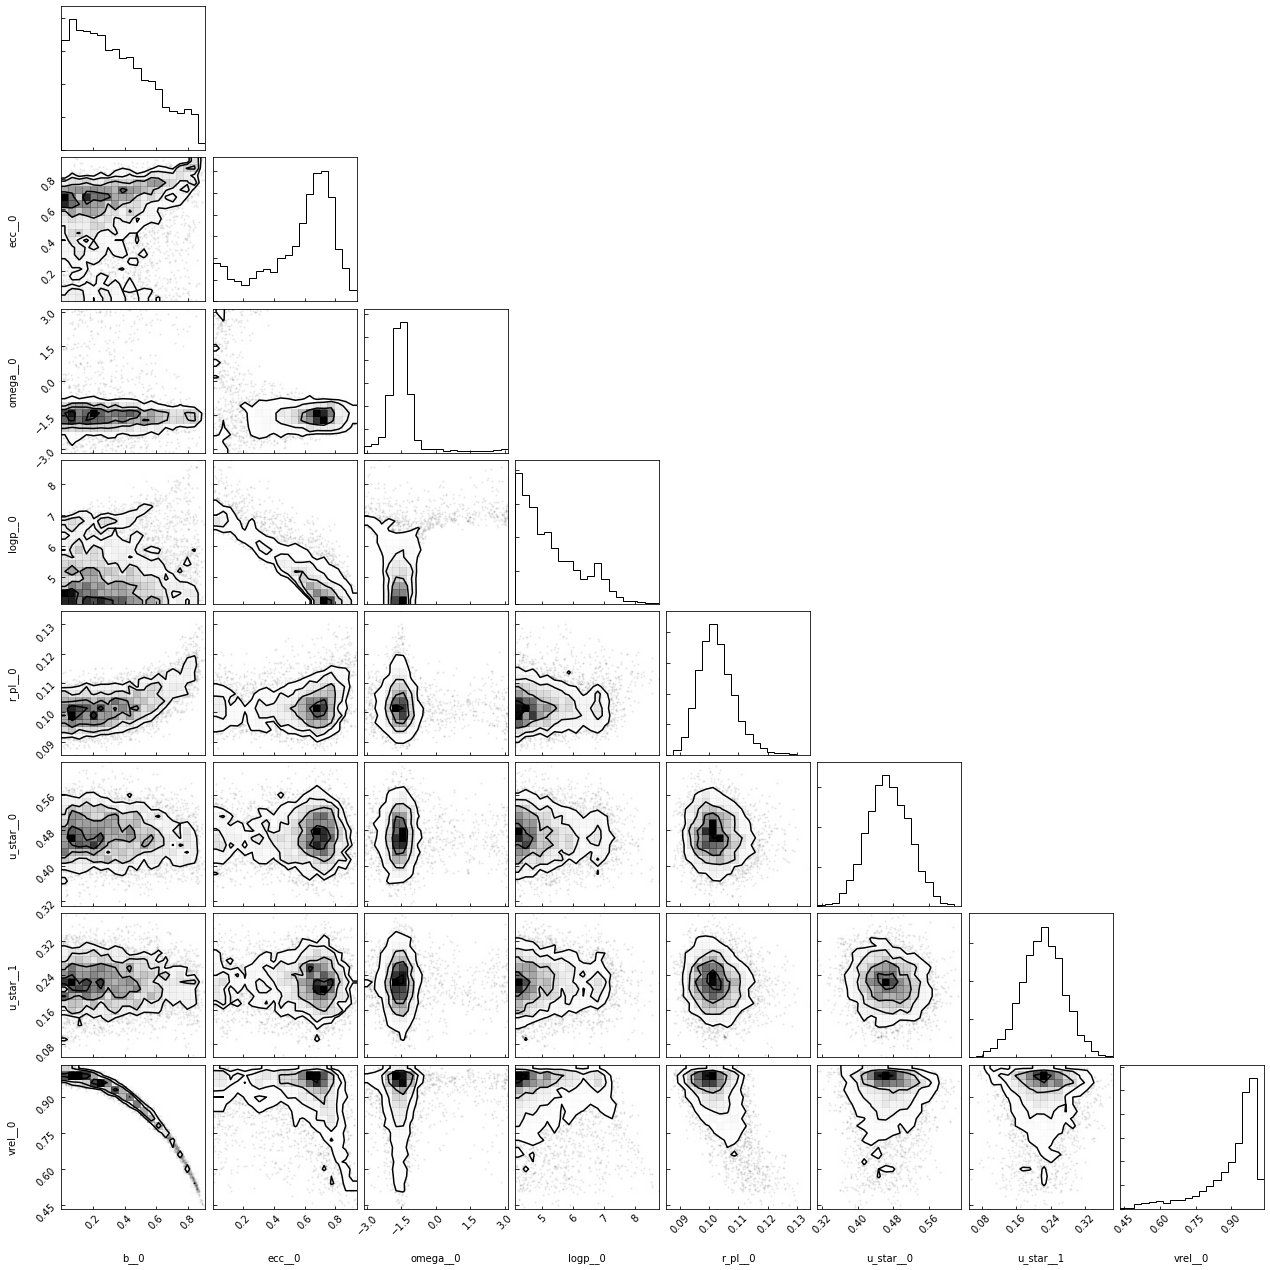

In [81]:
namaste.PlotCorner(trace, 248847494, mission='K2',varnames=["b", "ecc", "omega", "logp", "r_pl","u_star","vrel"])

# KIC8410697 (from Foreman-Mackey et al, 2016)

A Kepler example now.
Again we include an initial duration, as well as the necessary initial depth and t0.

Kepler file
(468, 3)
Kepler file
(1622, 3)
Kepler file
(4055, 3)
Kepler file
(4120, 3)
Kepler file
(4092, 3)
Kepler file
(4473, 3)
Kepler file
(4265, 3)
Kepler file
(4214, 3)
Kepler file
(3094, 3)
Kepler file
(4585, 3)
Kepler file
(4431, 3)
Kepler file
(4463, 3)
Kepler file
(3543, 3)
Kepler file
(4234, 3)
Kepler file
(4253, 3)
Kepler file
(4357, 3)
Kepler file
(3525, 3)
Kepler file
(1259, 3)
[(468, 3), (1622, 3), (4055, 3), (4120, 3), (4092, 3), (4473, 3), (4265, 3), (4214, 3), (3094, 3), (4585, 3), (4431, 3), (4463, 3), (3543, 3), (4234, 3), (4253, 3), (4357, 3), (3525, 3), (1259, 3)]
Initialising transit model
Teff: [5918  160  160]
[0.34878644 0.21907034] [0.05 0.05]
Rs __str__ = [1.003]
RpRs __str__ = [0.07416198]
u_star __str__ = [0.5 0.5]
r_pl __str__ = [0.07438447]
[1048.87895687] t0 [537.14118877 537.18205683 537.20249072 537.2229247  537.24335878
 537.26379266 537.28422665 537.30466073 537.32509461 537.34552859] 0.02043392084306106
optimizing logp for variables: ['rb_radiusimp

Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]
INFO:pymc3:NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]
Sampling 4 chains: 100%|██████████| 8000/8000 [08:50<00:00,  5.24draws/s] 
There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
There were 164 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 164 divergences after tuning. Increase `target_accept` or reparameterize.
There were 816 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 816 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.10441659218514178, but should be 

(3, 419, 1)
(419, 1)
0.7722824261448279 1.9596647805055196 2.5374975710479513
varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star', 'vrel']


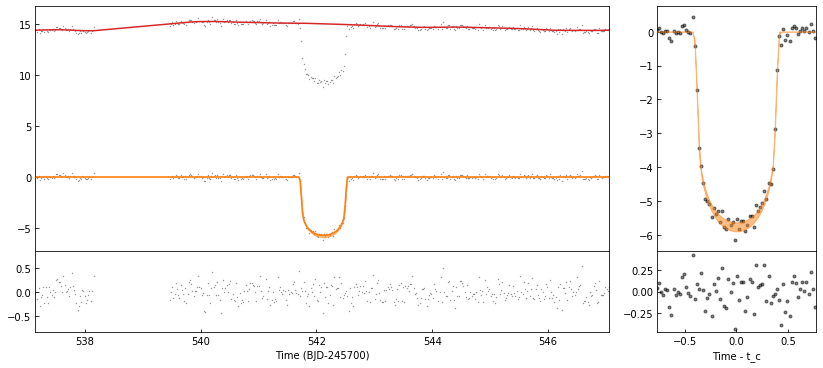

<Figure size 432x288 with 0 Axes>

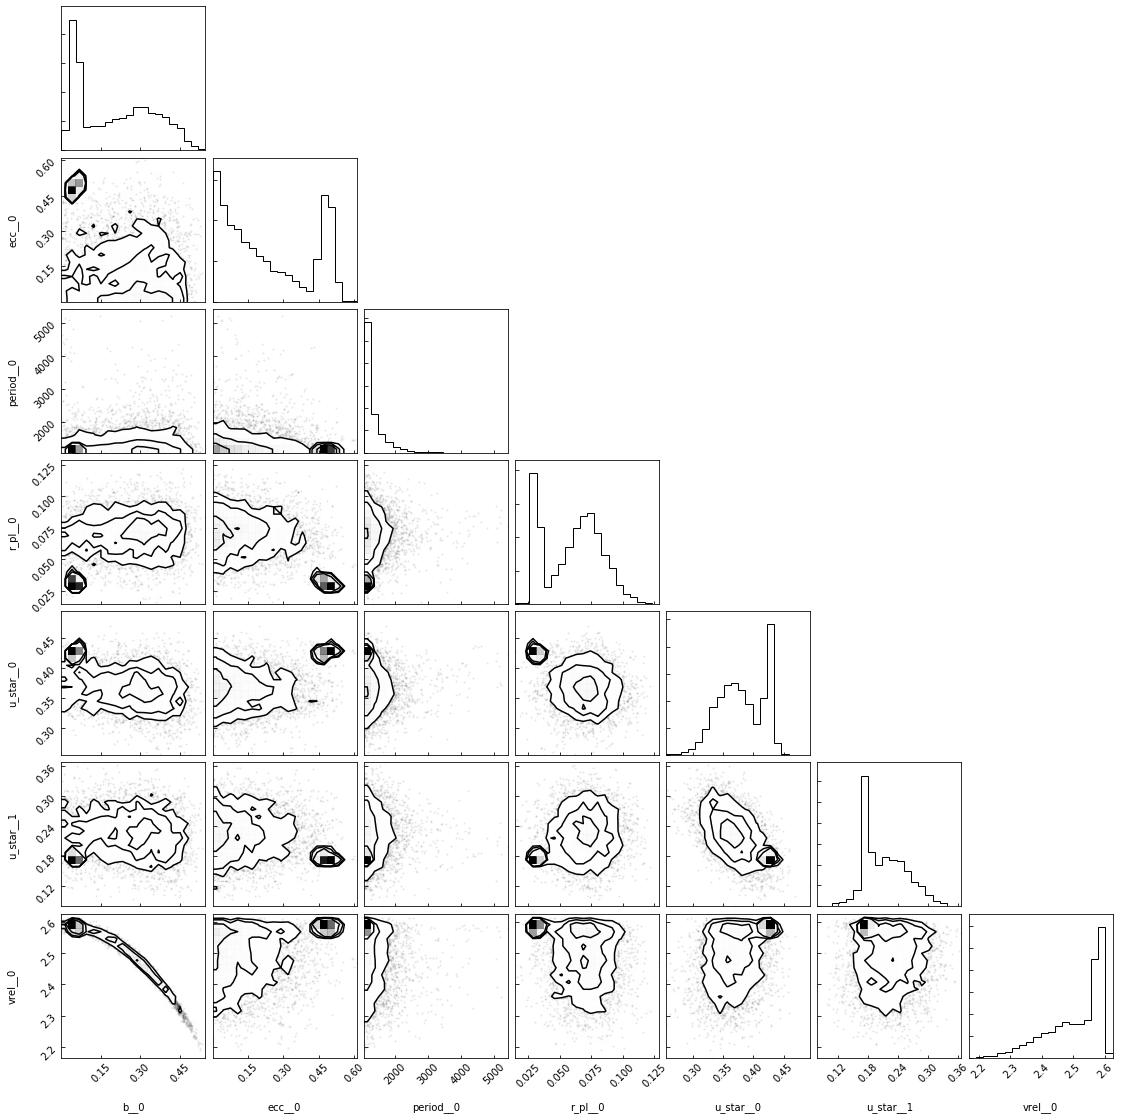

In [106]:
mod,trace,lc=namaste.Run(8410697, [5.5e-3], [542.1231],
                        stellardict={'Rs':1.003,'Rs_err':0.23,
                                     'rho_s': 1.201,'rho_s_err':0.7,
                                     'Teff':5918,'Teff_err':160,
                                     'logg':4.371,'logg_err':0.16},doplots=True,
                        mission='Kepler',cutDistance=5.0,initdur=[19.77/24.0])

# TBD:

## Let's try the 5-planet HIP 41378 system...

This is slightly more awkward as we have two campaigns and many possible "islands" in the period space...
What would be nice is if we could cut out the two transits in C16 data and overlay them with the earlier data, thereby fitting a period from the overlaid transits and a second time offset which can be used to give integer period positions.

In [150]:
mod,trace,lc=namaste.Run(211311380, [400e-6,320e-6,700e-6,1400e-6,5500e-6,700e-6,5500e-6],
                         [2319.283,2330.162,2333.273,2309.020,2353.9162,(2333.273+278.360*4),(2353.9162+542.0793*2)],
                         periods=[5.71493,31.6978,0.0,0.0,0,0,0,0],
                         initdur=[0.0,0.0,13/24.0,14.5/24.0,22/24.0,13/24.0,22/24.0],
                         stellardict={'Rs':1.3,'Rs_err':0.009,
                                     'rho_s': 0.785,'rho_s_err':0.008,
                                     'Teff':6290,'Teff_err':77,
                                     'logg':4.29,'logg_err':0.004},doplots=False,
                         mission='K2',cutDistance=2.5,n_draws=1000,LoadFromFile=True)

Initialising transit model
Teff: [6290   77   77]
1 48.15878780414732
[4.2861975, 23.77335, 48.15878780414732]
242.2539182012057 48.15878780414732
1 72.41178780414748
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748]
323.6788856496838 72.41178780414748
1 47.30558973678171
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748, 47.30558973678171]
999.7000691646358 47.30558973678171
1 28.14641135280226
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748, 47.30558973678171, 28.14641135280226]
242.2539182012057 28.14641135280226
1 31.305763086364095
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748, 47.30558973678171, 28.14641135280226, 31.305763086364095]
999.7000691646358 31.305763086364095
[0.3288645  0.22105668] [0.05 0.05]
Rs __str__ = [1.3]
RpRs __str__ = [0.02       0.01788854 0.02645751 0.03741657 0.07416198 0.02645751
 0.07416198]
u_star __str__ = [0.5 0.5]
r_pl __str__ = [0.026      0.02325511 0.03439477 0.04864155 0.09641058 0.03439477
 0.09641058]


In [149]:
namaste.PlotCorner(trace, "211311380",mission='K2')

varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star', 'vrel']


<Figure size 432x288 with 0 Axes>

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


 GAP IN X OF  3616
3314 3314 3314 3314
5972 5447 5447
0.09678845153182625 0.49192557186178376 1.7817378581921728 3.621966330086998
0.3408564428576677 0.4911737271595013 1.7782240936886462 3.6203566993948653
1.2374771193885552 0.4920343711850595 1.7797114135170924 3.61704693359262
3.142845199227487 0.492574421789631 1.7816705536389894 3.6170586104852727
9.520406072474827 0.4934798877768224 1.7844045058875124 3.6159619674196612
9.988881066618285 0.4930186486914814 1.7818970484145595 3.6142589193002834
16.33961557437759 0.4928553526681401 1.781013915112098 3.6136645477630194


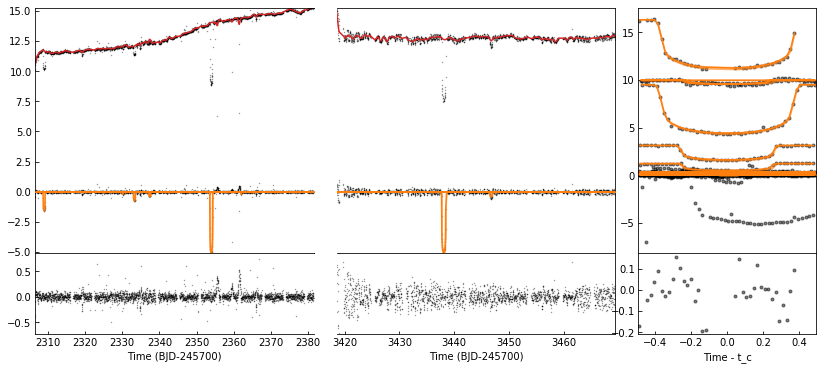

In [200]:
namaste.PlotLC(lc[:,:3],trace, "211311380",mission='K2',lcmask=lc[:,3].astype(bool),overwrite=True)

In [153]:
len(lc)

5972

In [157]:
len(trace["light_curves"][2,:].ravel())

38129

In [ ]:
pred = trace["light_curves"]

In [156]:
38129/5447

7.0

In [159]:
onepl_mod,onepl_trace,onepl_lc=namaste.Run(8410697, [5.5e-3], [542.1231],
                                        stellardict={'Rs':1.003,'Rs_err':0.23,
                                                     'rho_s': 1.201,'rho_s_err':0.7,
                                                     'Teff':5918,'Teff_err':160,
                                                     'logg':4.371,'logg_err':0.16},doplots=False,
                                        mission='Kepler',cutDistance=5.0,initdur=[19.77/24.0],LoadFromFile=True)

Initialising transit model
Teff: [5918  160  160]


INFO (theano.gof.compilelock): Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock


28 189.7261506698444
[189.7261506698444]
1109.928590027925 189.7261506698444
INFO  [theano.gof.compilelock._get_lock()]: Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock
[0.34851501 0.21932926] [0.05 0.05]
Rs __str__ = [1.003]
RpRs __str__ = [0.07416198]
u_star __str__ = [0.5 0.5]
r_pl __str__ = [0.07438447]
[189.72615067] t0 [537.14118877 537.18205683 537.20249072 537.2229247  537.24335878
 537.26379266 537.28422665 537.30466073 537.32509461 537.34552859] 0.02043392084306106
optimizing logp for variables: ['rb_radiusimpact__']
message: Optimization terminated successfully.
logp: -620.8558013593382 -> -596.2529013336166
optimizing logp for variables: ['logs2']
message: Optimization terminated successfully.
logp: -596.2529013336166 -> -20.143640772074853
optimizing logp for variables: ['t0', 'P_index_logodds__']
message: Desired error not necessarily achieved due to precision loss.
logp: -20.14364077207599 -> -10.7015485352643